# **Import Requiremnts**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

# **Load Dataset**

In [35]:
california = fetch_california_housing()

In [36]:
california


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# **Data Preprocessing**

In [37]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [38]:
data = pd.DataFrame(california.data, columns = california.feature_names)

In [39]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [41]:
data.duplicated().sum()

np.int64(0)

In [42]:
data.drop_duplicates(inplace = True)

array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='HouseAge', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel

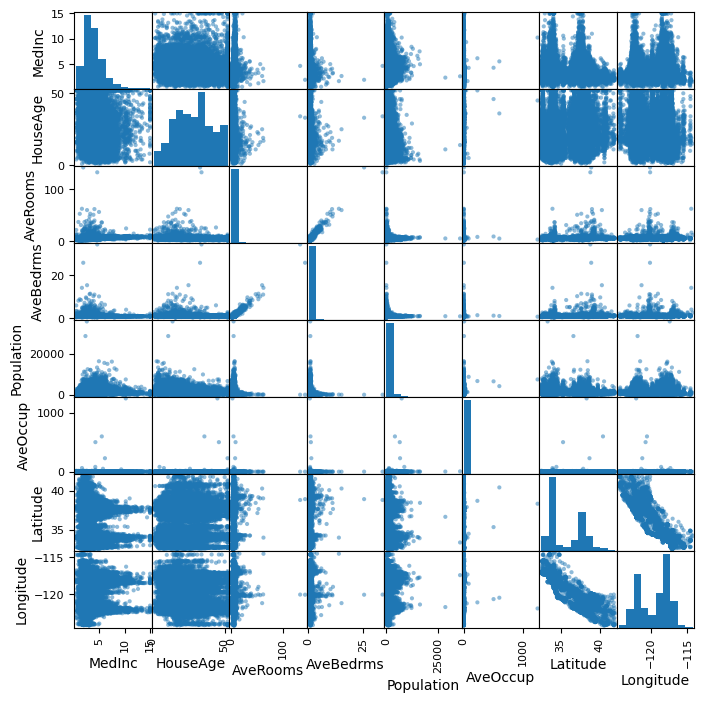

In [43]:
pd.plotting.scatter_matrix(data, figsize=(8, 8), diagonal='hist')

<Axes: >

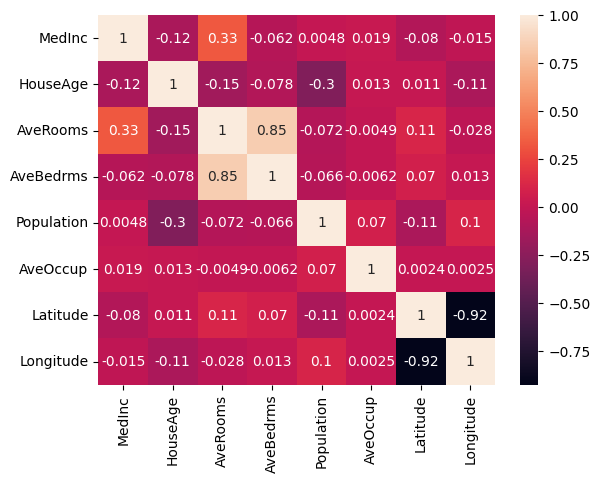

In [44]:
sns.heatmap(data.corr(),annot=True)

In [45]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

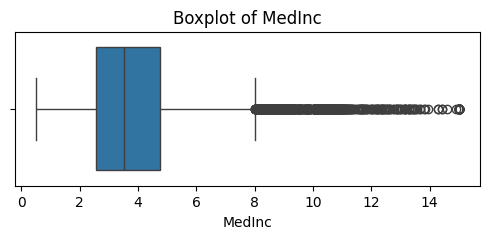

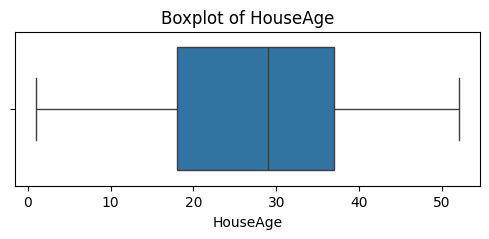

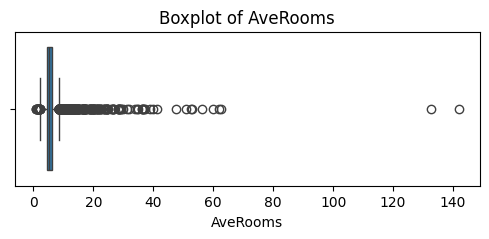

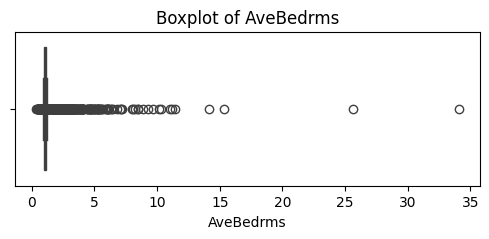

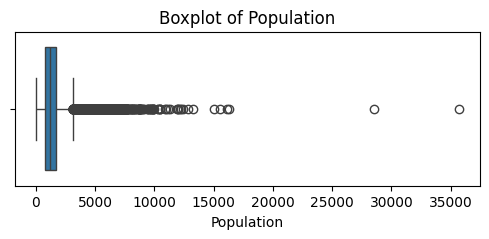

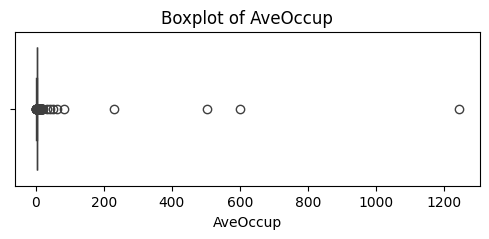

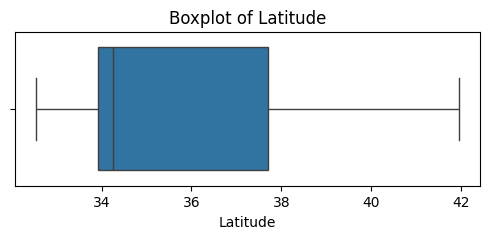

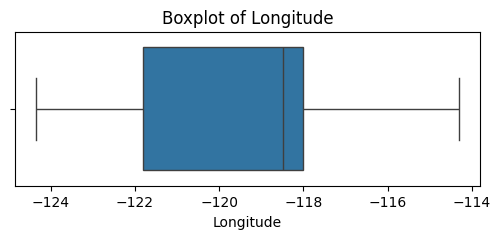

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [47]:
outlier_indices = set()
for col in data.select_dtypes(include=["number"]).columns:   # numeric cols only
    plt.figure(figsize=(6,2))

    Q1 = np.percentile(data[col], 25, method='midpoint')
    Q3 = np.percentile(data[col], 75, method='midpoint')
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier indices
    upper_array = data.index[data[col] >= upper].tolist()
    lower_array = data.index[data[col] <= lower].tolist()

    outlier_indices.update(upper_array + lower_array)

# finally drop all outliers at once
data = data.drop(index=outlier_indices).reset_index(drop=True)

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

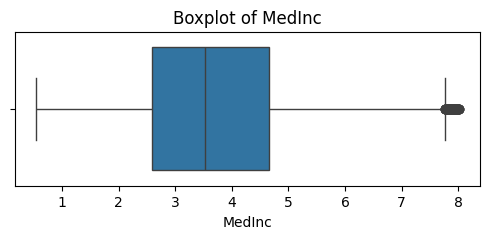

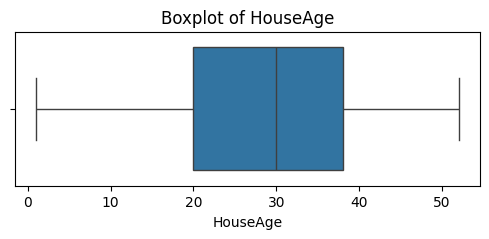

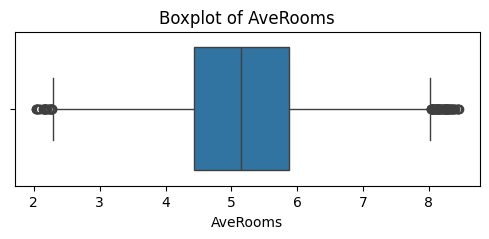

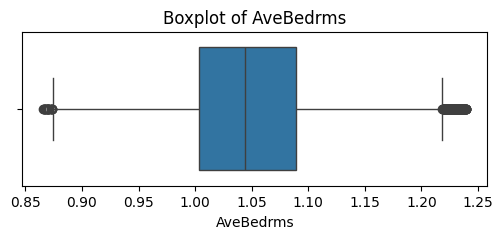

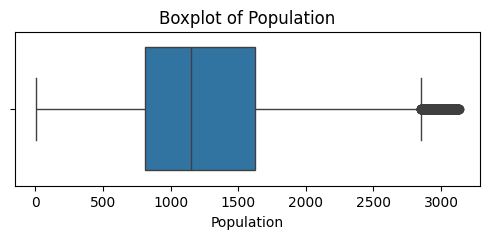

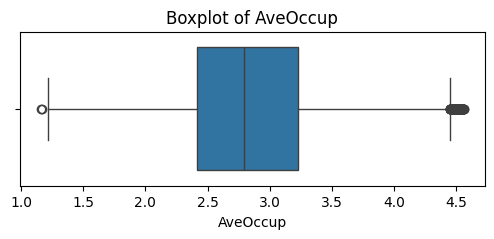

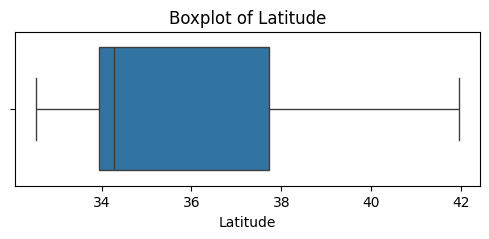

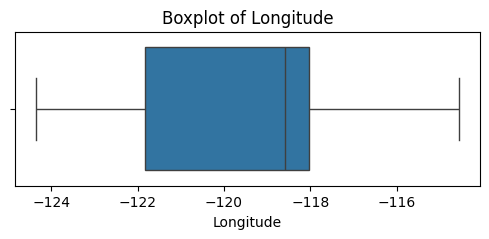

In [48]:
for col in data.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# **Spliting Data**

In [49]:
## Independent and Dependent features
X=data.iloc[:,:-1] #independent features
y=data.iloc[:,-1] #dependent features

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=42)

In [51]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
14446,3.5625,34.0,3.948187,0.943005,611.0,3.165803,37.38
530,6.0050,30.0,6.657795,1.022814,731.0,2.779468,37.70
1540,3.2222,41.0,3.268293,0.914634,198.0,2.414634,37.93
5407,2.2765,38.0,5.603175,1.199546,1661.0,3.766440,34.16
14490,5.5968,23.0,5.783871,1.029032,1145.0,3.693548,37.40
...,...,...,...,...,...,...,...
11284,1.9799,28.0,4.260234,1.160819,672.0,1.964912,32.76
11964,2.5070,30.0,3.963750,1.077500,2126.0,2.657500,32.64
5390,6.3467,44.0,6.994065,1.014837,891.0,2.643917,34.18
860,5.8170,18.0,6.982692,1.051923,1700.0,3.269231,37.68


In [52]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
5566,3.2361,28.0,3.654054,0.956757,543.0,2.935135,34.10
14306,5.3955,47.0,5.502336,0.995327,961.0,2.245327,37.30
12554,5.0278,14.0,6.230088,1.108407,1448.0,3.203540,32.99
3865,2.5320,39.0,3.734257,1.022670,2638.0,3.322418,34.04
5139,3.8300,35.0,5.593284,1.078358,1112.0,4.149254,34.03
...,...,...,...,...,...,...,...
3463,3.5172,43.0,3.988345,1.032634,1190.0,2.773893,34.10
9623,2.5804,34.0,5.390029,1.021994,2653.0,3.890029,33.97
3728,2.4620,6.0,3.232558,1.196617,1051.0,2.221987,34.04
11817,3.5179,16.0,3.647658,1.054990,1006.0,2.048880,32.79


In [53]:
y_train

,Longitude
14446,-121.84
530,-122.09
1540,-122.35
5407,-118.15
14490,-121.85
...,...
11284,-117.11
11964,-117.09
5390,-118.12
860,-121.91


In [54]:
y_test

,Longitude
5566,-118.07
14306,-121.89
12554,-116.89
3865,-118.32
5139,-117.94
...,...
3463,-118.29
9623,-117.37
3728,-118.26
11817,-117.11


In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
x_train

array([[-0.10297995,  0.3519842 , -1.15580493, ..., -1.04223212,
         0.51229109,  0.80702715],
       [ 1.54243977,  0.02452086,  1.41200633, ..., -0.85064178,
        -0.10072074,  0.95724144],
       [-0.33222717,  0.92504504, -1.80011915, ..., -1.70162221,
        -0.67961477,  1.06520795],
       ...,
       [ 1.77263011,  1.17064255,  1.73067951, ..., -0.59518799,
        -0.31580384, -0.69511572],
       [ 1.41579129, -0.95786916,  1.7199017 , ...,  0.69645023,
         0.67640335,  0.94785304],
       [-0.26843137, -1.20346666,  0.61337035, ...,  0.67090486,
        -0.13773958,  0.99479501]])

# **training model**

In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
lr.coef_

array([-0.47450959, -0.1834782 ,  0.35671285, -0.06930307, -0.03103636,
        0.01086835, -1.94210827])

In [58]:
lr.intercept_

np.float64(-119.63785669041962)

In [59]:
y_pred = lr.predict(x_test)

# **Evaluation**

In [60]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.37982302016257313
0.4637832924327329
0.6162978339752405


In [61]:
print(r2_score(y_test,y_pred))

0.9054716747651952


In [62]:
score = r2_score(y_test,y_pred)

In [63]:
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.9053142025432429


Text(0, 0.5, 'Test Predicted Data')

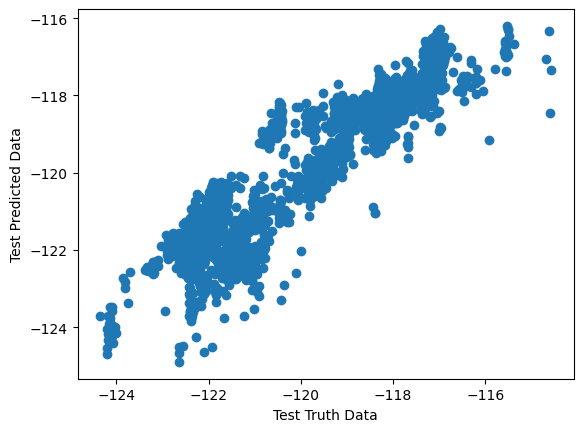

In [64]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

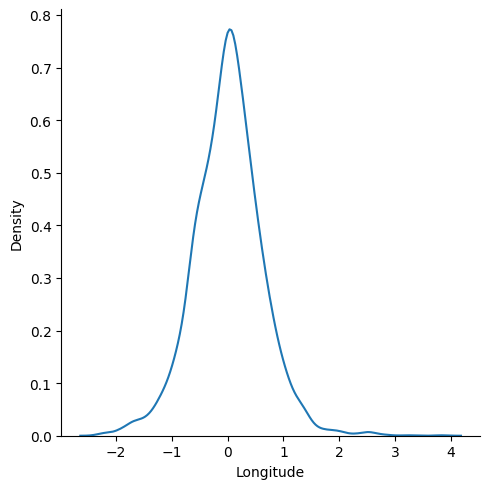

In [65]:
residuals=y_test-y_pred
sns.displot(residuals,kind="kde")

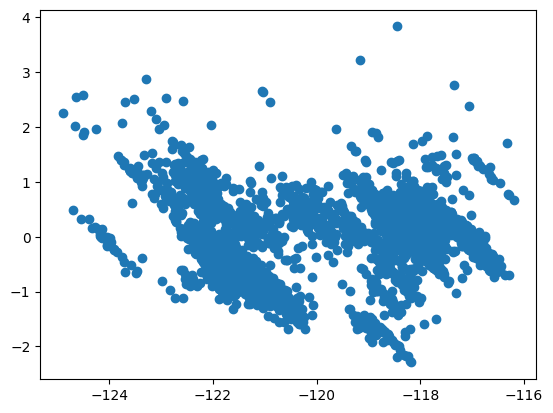

In [66]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)